In [9]:
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install h5py
!pip install scanpy



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
  Obtaining dependency information for tensorboard from https://files.pythonhosted.org/packages/0a/32/2e8545fb0592f33e3aca5951e8b01008b76d61b440658cbdc37b4eaebf0b/tensorboard-2.17.0-py3-none-any.whl.metadata
  Obtaining dependency information for absl-py>=0.4 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from dataload import *
from utils import *
%load_ext autoreload
%autoreload 2

In [3]:
dataset = dense_Dataset('data/trizod_embeddings.h5', 'data/rest_set_unfiltered_with_dense_format.tsv', test_perc=0, val_perc=0.15, label_col='pscores', id_col='ID') 

In [4]:
train_keys, val_keys = dataset.train_keys, dataset.val_keys
train_loader = CNN_Dataloader(dataset, train_keys, batch_size=64, shuffle=True)
val_loader = CNN_Dataloader(dataset, val_keys, batch_size=64, shuffle=True)

In [5]:
hparams = {
    'epochs': 15,
    'lr':3e-4,
    'patience': 5,
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')
}

In [5]:
model, losses_train, losses_val, outputs, targets = train_CNN(train_loader, val_loader, hparams)

Number of trainable parameters: 1967105
starting training


D:\programming\PP1\.venv\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/15:   0%|          | 0/72 [00:00<?, ?it/s]D:\programming\PP1\dataload.py:50: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  return torch.tensor(self.embed_file[index], dtype=torch.float), torch.tensor(self.dense[index],
Epoch 1/15:   3%|▎         | 2/72 [00:02<01:39,  1.42s/it]D:\programming\PP1\.venv\lib\site-packages\torch\nn\modules\conv.py:306: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Trigg

Best validation loss: 0.007973134875870667


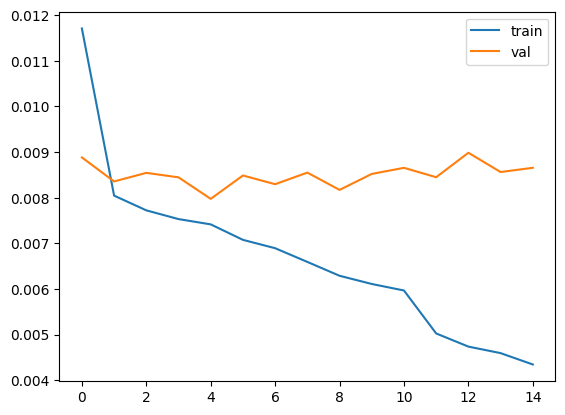

In [6]:
plt.plot(losses_train, label='train')
plt.plot(losses_val, label='val')
plt.legend()
plt.savefig("no_learn_example.png")
plt.show()

In [9]:
# save cnn model
torch.save(model.state_dict(), 'models/cnn_disorder_model_unfiltered_3e-4lr_30epochs_scheduler.pth')

MSE: 0.006000702269375324


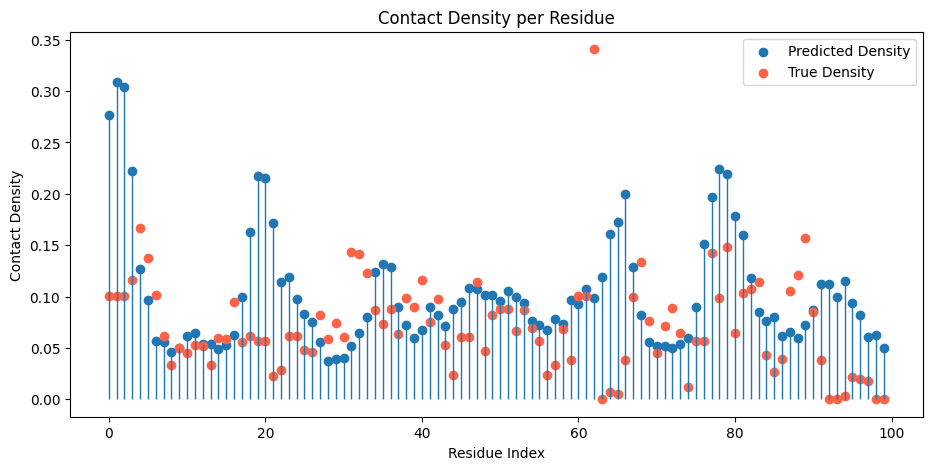

In [10]:
truths = targets.cpu().numpy()
preds = outputs.detach().cpu().numpy()

# add mean to both predictions and truths
# truths = truths + target_mean.item()
# preds = preds + output_mean.item()
# clip predictions to 0
# preds = np.clip(preds, 0, None)

# calculate MSE between predictions and truths
mse = np.mean((truths - preds) ** 2)
print(f"MSE: {mse}")

truths = truths[:100]
preds = preds[:100]
plt.figure(figsize=(11, 5))
plt.scatter(range(len(preds)), preds, label="Predicted Density")
plt.scatter(range(len(truths)), truths, c="tomato", label="True Density")
plt.vlines(x=range(len(preds)), linestyle='-', linewidth=1, ymin=0, ymax=preds)
plt.xlabel("Residue Index")
plt.ylabel("Contact Density")
plt.title("Contact Density per Residue")
plt.legend()
plt.savefig("cnn_big_3convs.png")
plt.show()

In [10]:
# calculate mean of truths vs mean of preds
print(f"Mean of truths: {np.mean(truths)}, Mean of preds: {np.mean(preds)}")

Mean of truths: 0.037962961941957474, Mean of preds: 0.03768008574843407


In [ ]:
# shut down windows pc
# import os
# os.system("shutdown /s /t 1")


# OVERFIT ON ONE SAMPLE

In [37]:
overfit_hparams = {
    'epochs': 100,
    'lr':0.001,
    'patience': 100,
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu')
}

In [38]:
# overfit on one sample
overfit_train_loader = CNN_Dataloader(dataset, train_keys[:1], batch_size=128, shuffle=True)
overfit_val_loader = CNN_Dataloader(dataset, val_keys[:1], batch_size=128, shuffle=True)


In [39]:
model, losses_train, losses_val, outputs, targets = train_CNN(overfit_train_loader, overfit_val_loader, overfit_hparams, train_preds=True)


starting training


Epoch 100/100: 100%|██████████| 1/1 [00:00<00:00, 34.96it/s]


Best validation loss: 0.021664073690772057


MSE: 0.0001348426885670051


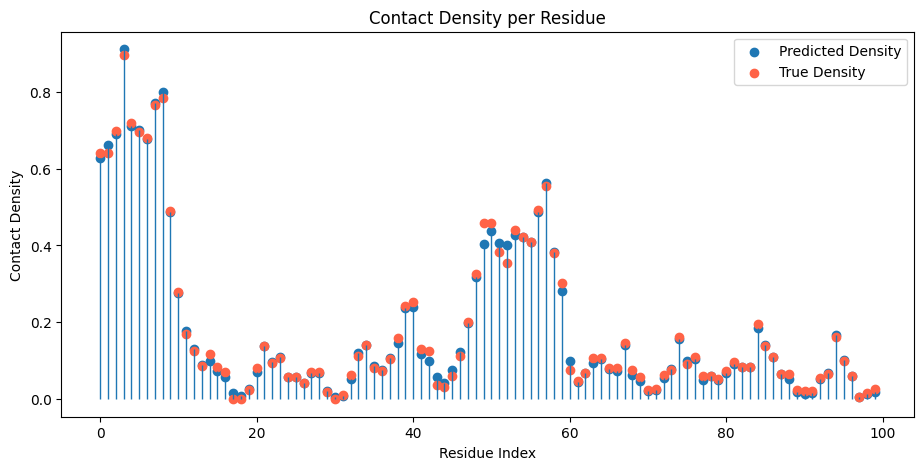

In [40]:
truths = targets.cpu().numpy()
preds = outputs.detach().cpu().numpy()

# add mean to both predictions and truths
# clip predictions to 0
# preds = np.clip(preds, 0, None)

# calculate MSE between predictions and truths
mse = np.mean((truths - preds) ** 2)
print(f"MSE: {mse}")

truths = truths[:100]
preds = preds[:100]
plt.figure(figsize=(11, 5))
plt.scatter(range(len(preds)), preds, label="Predicted Density")
plt.scatter(range(len(truths)), truths, c="tomato", label="True Density")
plt.vlines(x=range(len(preds)), linestyle='-', linewidth=1, ymin=0, ymax=preds)
plt.xlabel("Residue Index")
plt.ylabel("Contact Density")
plt.title("Contact Density per Residue")
plt.legend()
plt.savefig("cnn_overfit.png")
plt.show()

# Test the model on the validation set

First we need to load the model from the state dict and then we can test it on the validation set.
Finally we can calculate the MSE between the predictions and the truths. As well as plot some results

In [6]:
model = load_model('models/cnn_model_0.001lr_30epochs_scheduler.pth', hparams)

model = model.to(hparams['device'])

In [7]:
dataset = dense_Dataset('data/trizod_embeddings_test_pdb.h5', 'data/trizod_test_set_dense.tsv', test_perc=0.15, val_perc=0) 
test_keys = dataset.test_keys
test_loader = CNN_Dataloader(dataset, test_keys, batch_size=128, shuffle=True)

In [8]:
len(test_keys)

147

In [9]:
# test the model on the validation set
predictions = []
ground_truths = []
keys = []
model.eval()
for inputs, targets, ids in test_loader:
    inputs, targets = inputs.to(hparams['device']), targets.to(hparams['device'])
    outputs = model(inputs)
    predictions.append(outputs.detach().cpu().numpy())
    ground_truths.append(targets.cpu().numpy())
    keys.append(ids)


D:\programming\PP1\dataload.py:50: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  return torch.tensor(self.embed_file[index], dtype=torch.float), torch.tensor(self.dense[index],


In [18]:
print(predictions[0].shape)
print(ground_truths[0].shape)
print(len(keys[0]))
print(max(predictions[0][2]))
print(min(predictions[0][2]))

(128, 248)
(128, 248)
128
0.059140906
-0.0059591886


In [13]:
truths = targets.cpu().numpy()
preds = outputs.detach().cpu().numpy()
# calculate MSE between predictions and truths
mse = np.mean((truths - preds) ** 2)
print(f"MSE: {mse}")
protein_num = 4
protein_name = keys[-1][protein_num]
# pdbchain 4A8XA has 88 residues
truths = truths[protein_num][:88]
preds = preds[protein_num][:88]
mins = [min(truths[i], preds[i]) for i in range(len(truths))]
maxs = [max(truths[i], preds[i]) for i in range(len(truths))]
# choose line color to be blue if the prediction is less than the truth, else choose red
line_color = ['#5783A2' if preds[i] < truths[i] else 'tomato' for i in range(len(truths))]

MSE: 0.015783505514264107


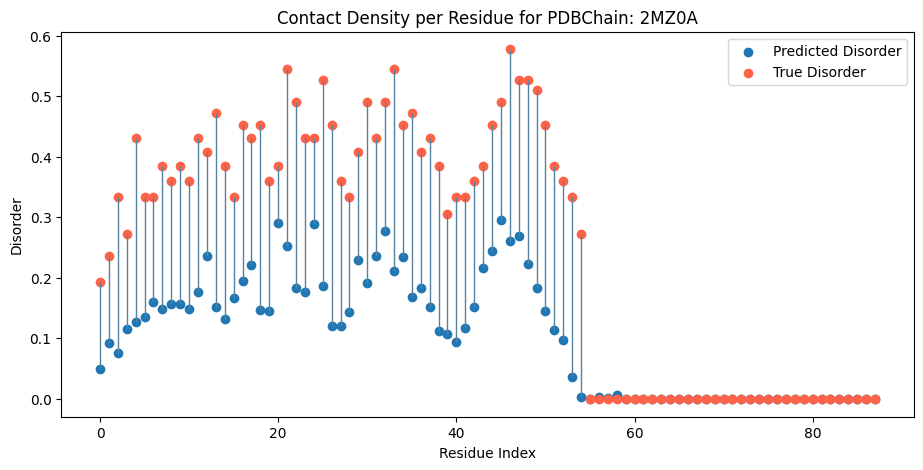

In [14]:
plt.figure(figsize=(11, 5))
plt.scatter(range(len(preds)), preds, label="Predicted Disorder")
plt.scatter(range(len(truths)), truths, c="tomato", label="True Disorder")
plt.vlines(x=range(len(preds)), linestyle='-', linewidth=1, ymin=mins, ymax=maxs, colors=line_color)
plt.xlabel("Residue Index")
plt.ylabel("Disorder")
plt.title("Contact Density per Residue for PDBChain: " + protein_name)
plt.legend()
plt.savefig("cnn_test.png")
plt.show()

In [13]:
predictions = {'test_preds': predictions, 'test_truths': ground_truths, 'test_ids': keys}
with open('trizod_test_set_predictions_final_cnn.pkl', 'wb') as f:
    pickle.dump(predictions, f)